In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display, HTML

list_weight100 = ["log_2024_02_08_06_53_32.csv"]
list_weight1 = ["log_2024_02_08_07_26_11.csv"]


weight100 = []
weight1 = []

for i in range (1):
    
    weight100.append(pd.read_csv(list_weight100[i], 
    names = ["n","y","ymax","x0","x1","x0max","x1max"],
    encoding="SHIFT-JIS"))
    
    weight1.append(pd.read_csv(list_weight1[i], 
    names = ["n","y","ymax","x0","x1","x0max","x1max"],
    encoding="SHIFT-JIS"))
    

Alldata = [weight100,weight1]
AlldataName = ["Weight100","weight1"]
#AlldataNameE = [Weight100","weight1"]

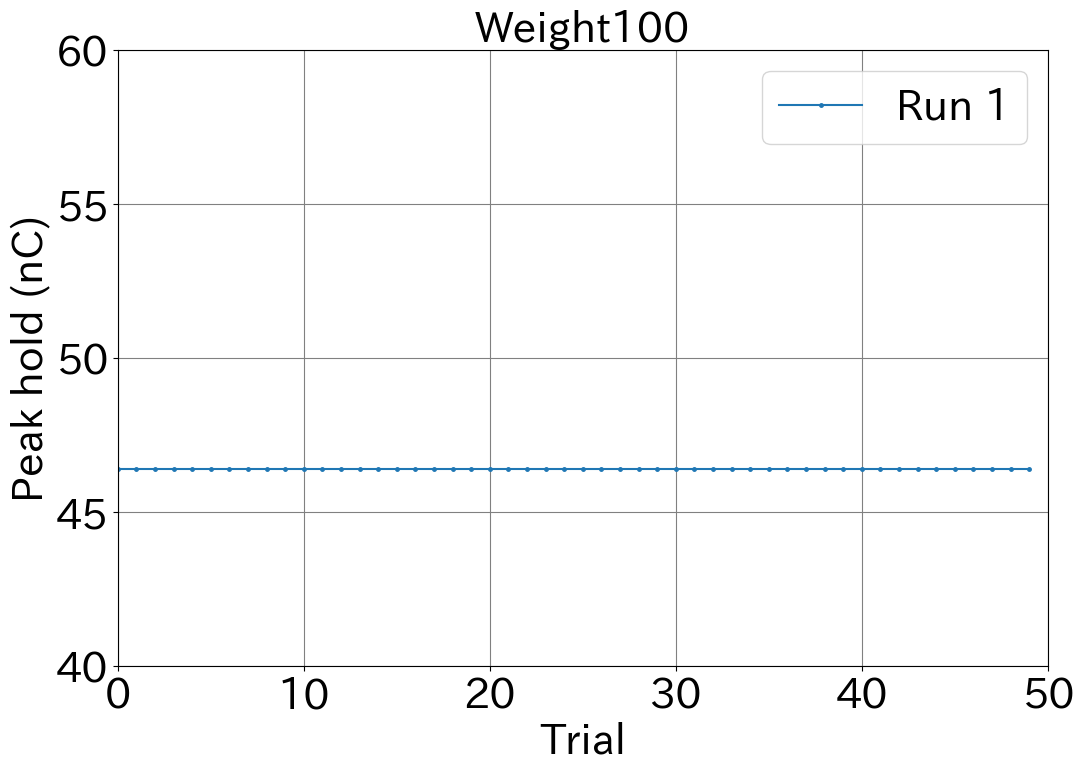

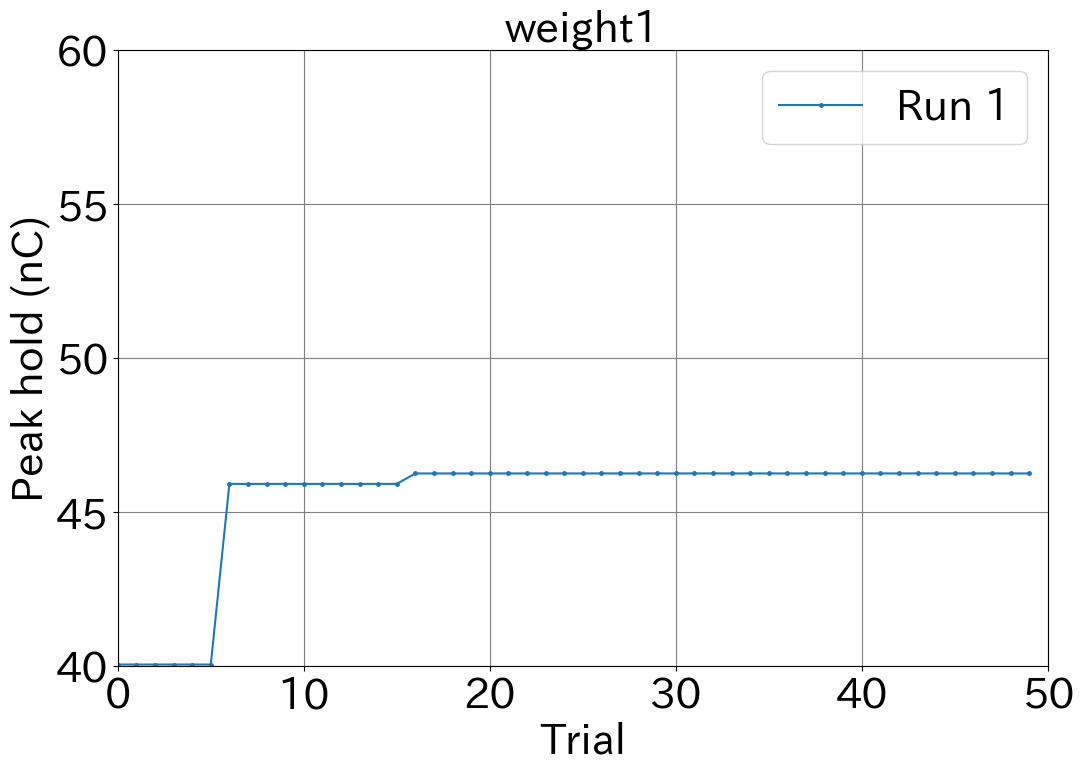

In [19]:
for j in range (len(Alldata)):

    fig_sum_j,ax_sum_j = plt.subplots(1,1,figsize=[12,8])

    for i in range (len(Alldata[j])):
        plt.plot(Alldata[j][i]["n"],Alldata[j][i]["ymax"], marker = "." , markersize = 5, label = "Run " + str(i+1))
    plt.tick_params(labelsize=30)
    ax_sum_j.grid(which = "major" , color = "gray" , linestyle = "-")
    ax_sum_j.set_xlabel("Trial", fontsize=30)
    ax_sum_j.set_xlim(0,50)
    ax_sum_j.set_ylabel("Peak hold (nC)", fontsize=30)
    ax_sum_j.set_ylim(40,60)
    ax_sum_j.legend(fontsize=30)
    ax_sum_j.set_title(AlldataName[j], fontsize=30)
    fig_sum_j.savefig(AlldataName[j] + "peakhold.png")

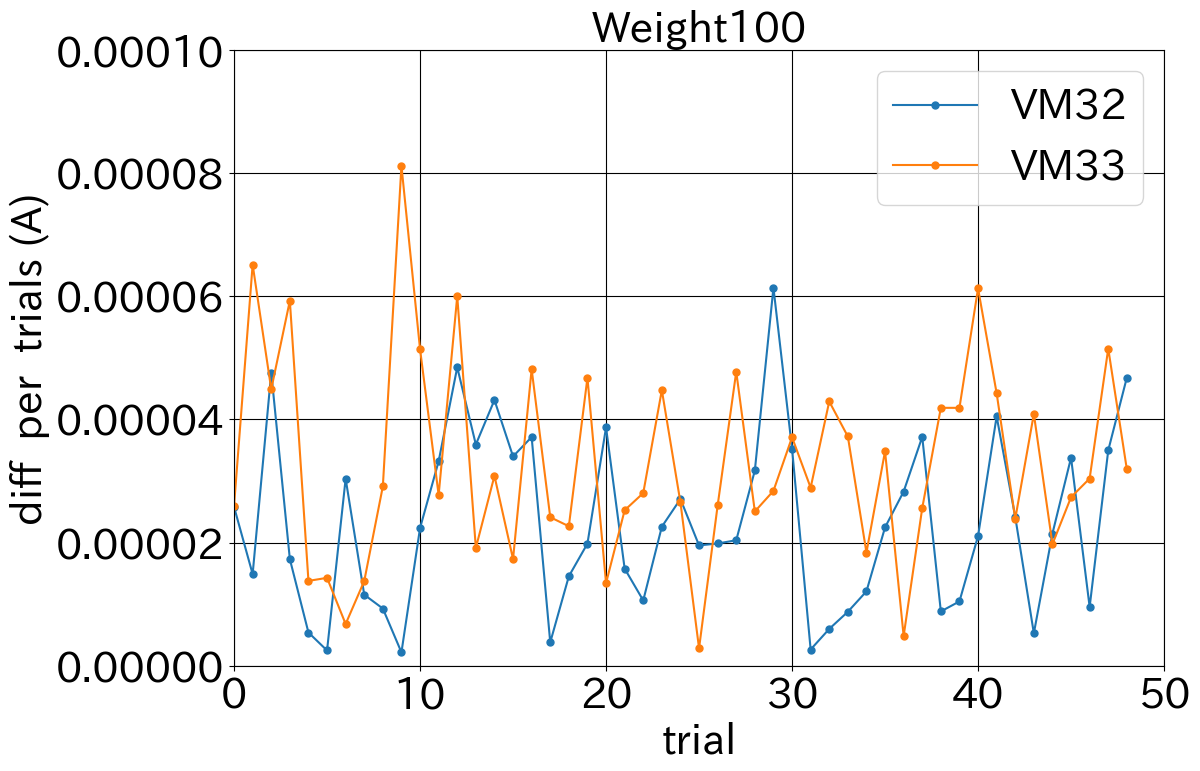

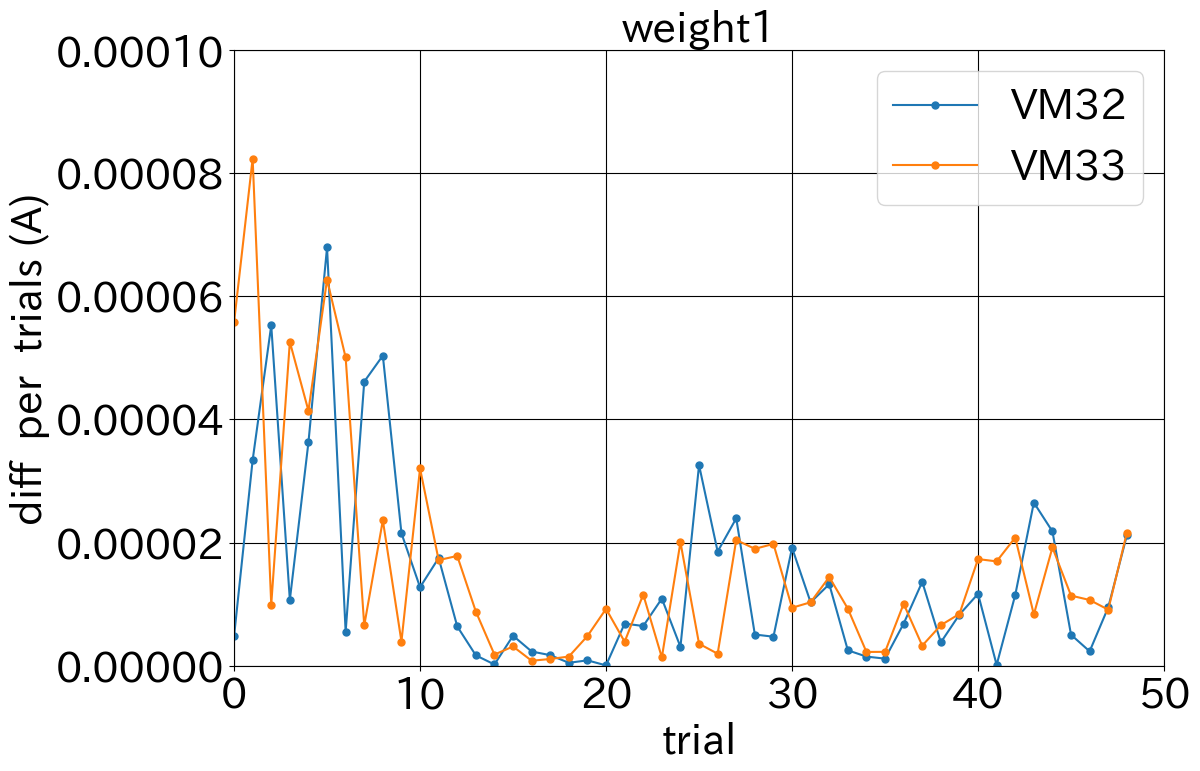

In [37]:
xxx = []
xx = []
x = [] 
a = []

mean_qp = []
mean_p = []
b = 0

numbers = [i for i in range(0, len(Alldata[0][0])-1)]
for r in range (len(Alldata)): #All dataの数
    for k in range (len(Alldata[r])): #runの数
        for j in range (int((len(Alldata[r][k].columns)-3)/2)): #パラメータの指定
            for i in range (len(Alldata[r][k])-1): #セルの列数

                a.append(abs(Alldata[r][k]["x" + str(j)][i+1] - Alldata[r][k]["x" + str(j)][i]))
            
            x.append(a)
            a = []
            
        xx.append(x)
        x = []
    
    xxx.append(xx)
    xx = []
    
    fig_r,ax_r = plt.subplots(1,1,figsize=[12,8])
    
    for p in range (int((len(Alldata[r][k].columns)-3)/2)):
        for q in range (len(Alldata[r][k])-1): 
            for m in range (len(Alldata[r])):
                b = b + xxx[r][m][p][q]
            
            mean_qp.append(b/(m+1))
            b = 0
            
        mean_p.append(mean_qp)
        mean_qp = []



    plt.plot(numbers,mean_p[0], marker = "." , markersize = 10 , label = "VM32")
    plt.plot(numbers,mean_p[1], marker = "." , markersize = 10 , label = "VM33")


    ax_r.grid(which = "major" , color = "black" , linestyle = "-")
    ax_r.set_xlabel("trial", fontsize=30)
    ax_r.set_xlim(0,50)
    ax_r.set_ylabel("diff  per  trials (A)", fontsize=30)
    ax_r.set_ylim(0,0.0001)
    ax_r.legend(fontsize=30)
    ax_r.set_title(AlldataName[r], fontsize=30)
    ax_r.tick_params(labelsize=30)
    mean_p = []
    #fig_r.savefig(AlldataName[r] + " diff.png")


In [32]:
print(len(Alldata))
print(len(Alldata[0]))
print(len(Alldata[0][0].index))
print((len(Alldata[0][0].columns)-3)/2)

2
1
50
2.0


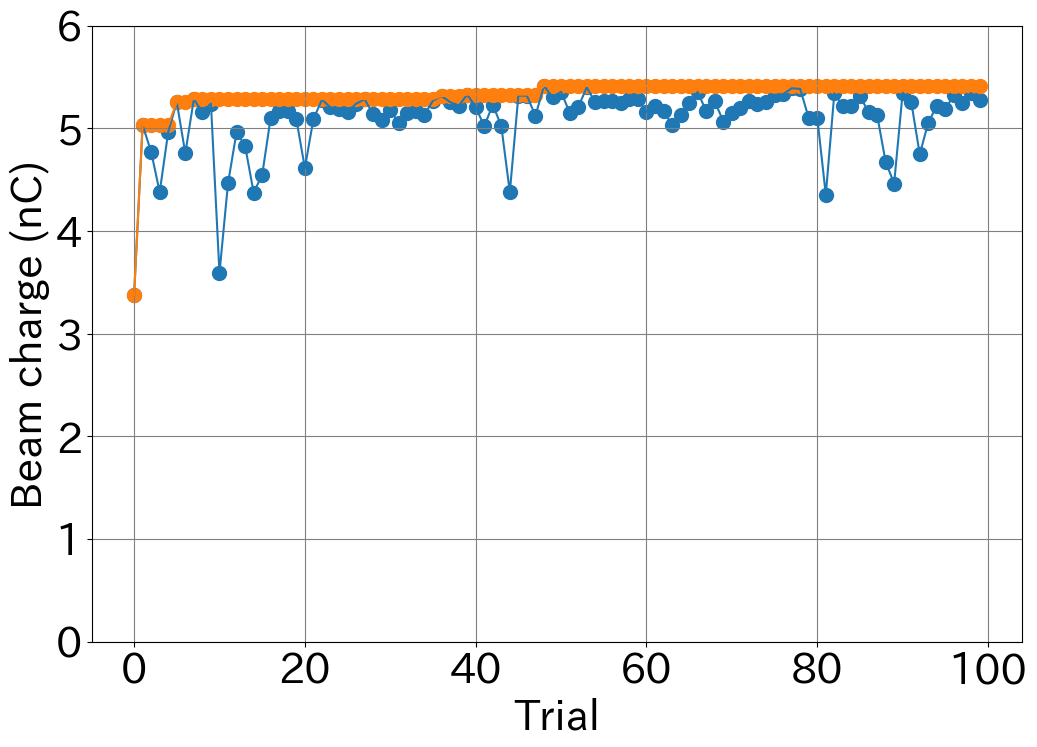

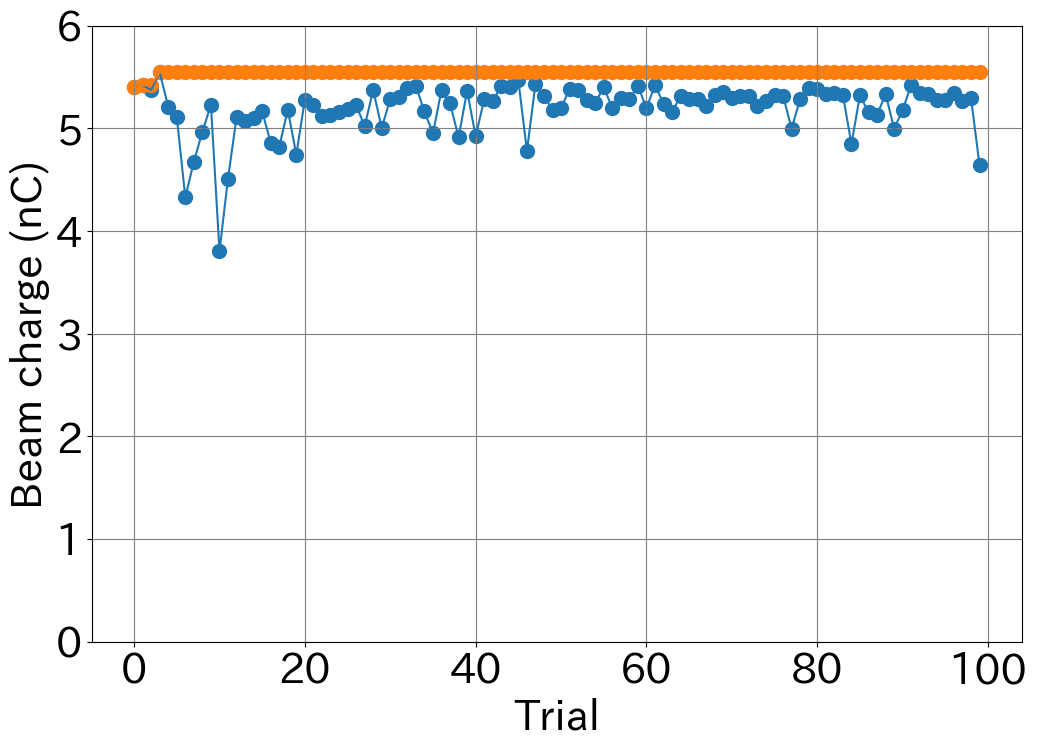

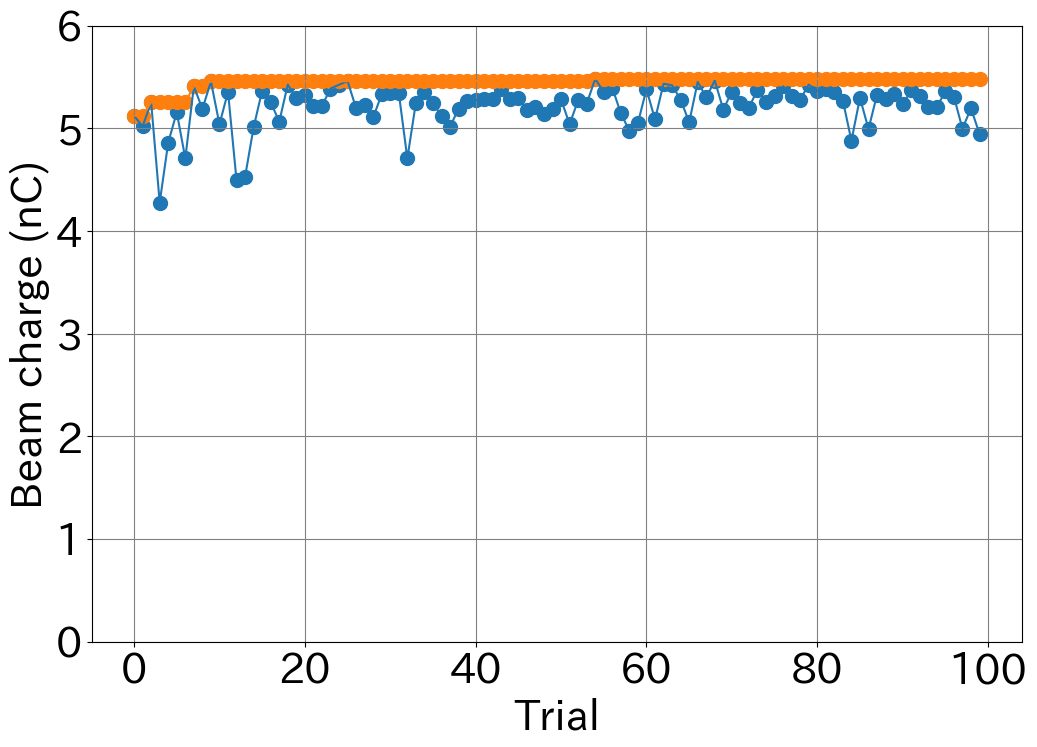

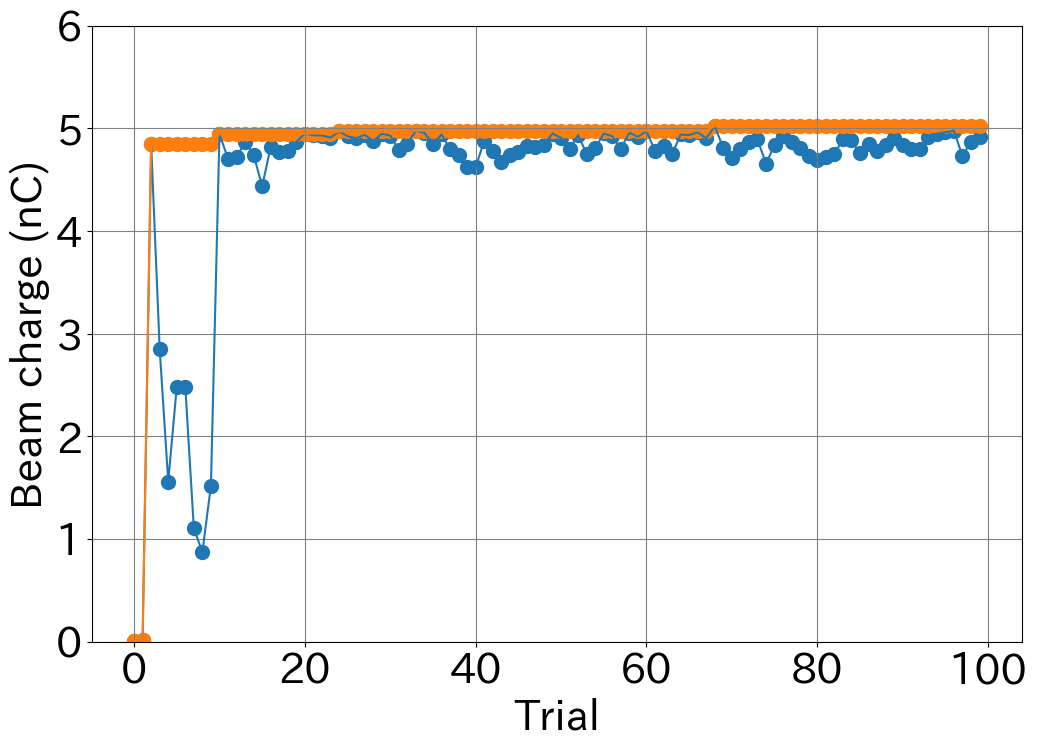

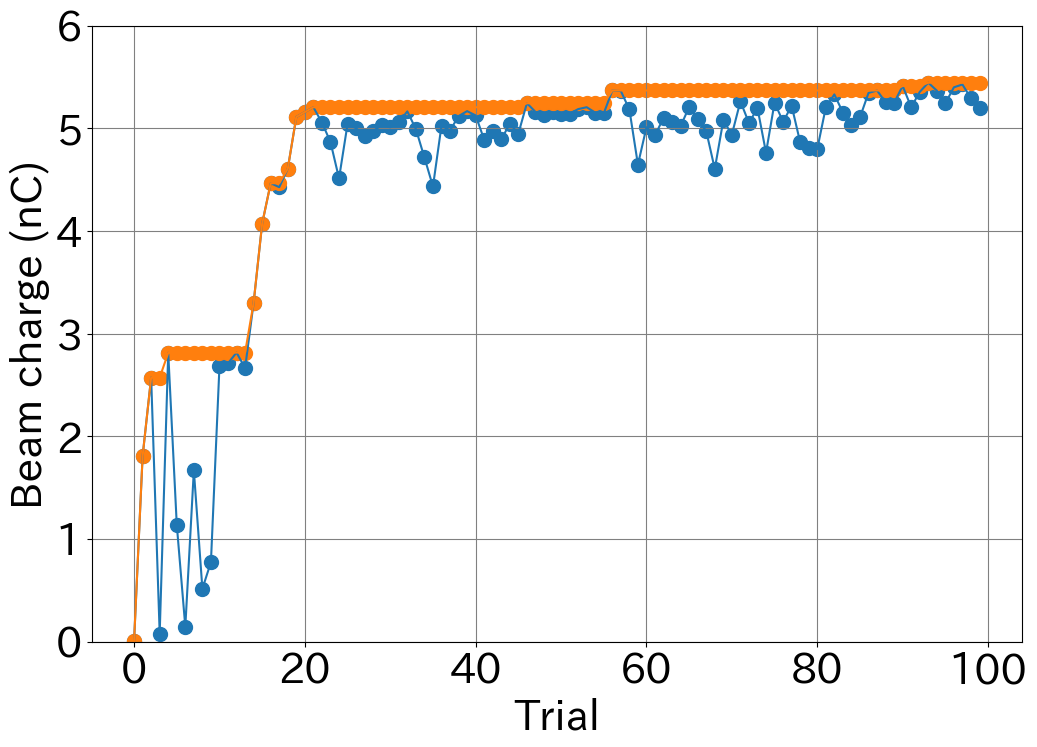

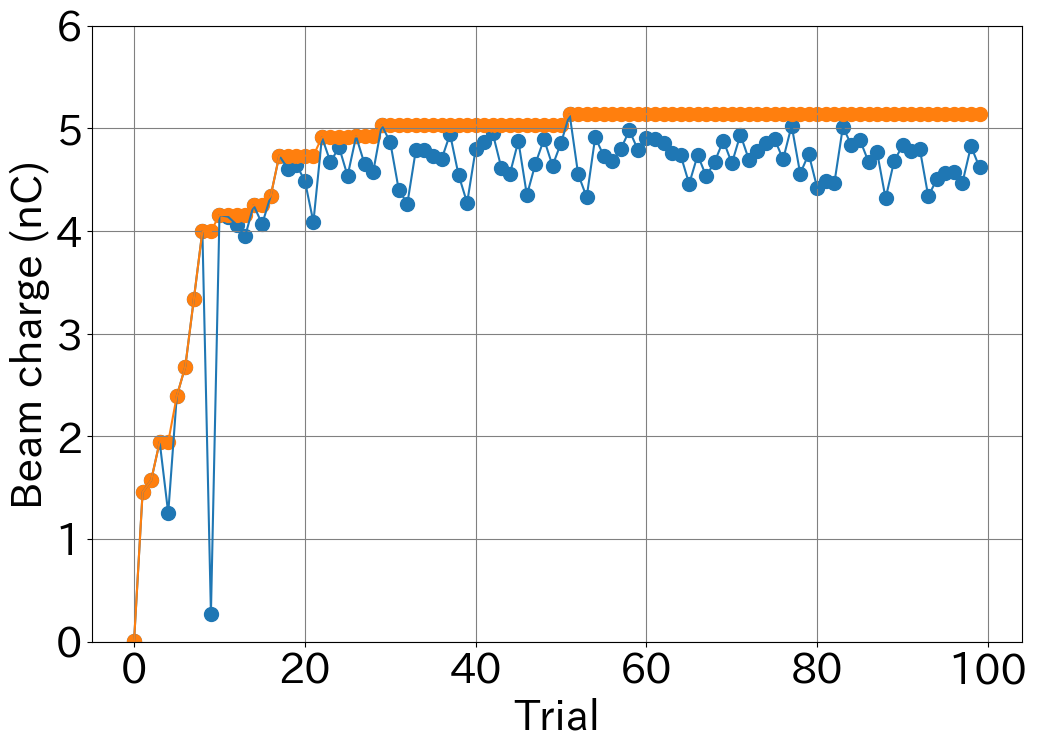

In [40]:

#fig2, ax2 = plt.subplots(1, 1, figsize=[12, 8])

for i in range (3):
    
    fig1, ax1 = plt.subplots(1, 1, figsize=[12, 8])
    
    ax1.tick_params(labelsize=30)
    ax1.grid(which="major", color="gray", linestyle="-")
    ax1.set_xlabel("Trial", fontsize=30)
    ax1.set_ylabel("Beam charge (nC)", fontsize=30)
    ax1.set_ylim(0,6)
    ax1.plot(EnqueueUCB[i]["n"], EnqueueUCB[i]["y"], color="tab:blue")  # 線を描写
    ax1.scatter(EnqueueUCB[i]["n"], EnqueueUCB[i]["y"], color="tab:blue", s=100)  # 点を描写
    ax1.plot(EnqueueUCB[i]["n"], EnqueueUCB[i]["ymax"], color="tab:orange")
    ax1.scatter(EnqueueUCB[i]["n"], EnqueueUCB[i]["ymax"],color="tab:orange", s=100)
    
for i in range (3):  #上のforとまとめると順番が混ざるために分離

    fig2, ax2 = plt.subplots(1, 1, figsize=[12, 8])
    
    ax2.tick_params(labelsize=30)
    ax2.grid(which="major", color="gray", linestyle="-")
    ax2.set_xlabel("Trial", fontsize=30)
    ax2.set_ylabel("Beam charge (nC)", fontsize=30)
    ax2.set_ylim(0,6)
    ax2.plot(FixedUCB[i]["n"], FixedUCB[i]["y"], color="tab:blue")  # 線を描写
    ax2.scatter(FixedUCB[i]["n"], FixedUCB[i]["y"], color="tab:blue", s=100)  # 点を描写
    ax2.plot(FixedUCB[i]["n"], FixedUCB[i]["ymax"], color="tab:orange")
    ax2.scatter(FixedUCB[i]["n"], FixedUCB[i]["ymax"],color="tab:orange", s=100)
    
    